<a href="https://colab.research.google.com/github/soralee2821/coding/blob/master/%EA%B3%B5%EA%B3%B5%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 시각화 도구 설치
!pip install plotnine

ERROR: Operation cancelled by user


In [ ]:
!pip install missingno

In [ ]:
import pandas as pd
import numpy as np
import re

In [ ]:
%pwd

'/content'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd './drive/MyDrive/data'

/content/drive/MyDrive/data


In [ ]:
%ls

전국_평균_분양가격_2018.6월_.csv
전국_평균_분양가격_2018.7월_.csv
지역별_3.3㎡당_평균_분양가격_천원__15.09월.csv
shop_201806_01.csv


In [ ]:
pre_sale = pd.read_csv('전국_평균_분양가격_2018.7월_.csv', encoding='euc-kr')
pre_sale.shape

(2890, 5)

In [ ]:
pre_sale.head()

,지역명,규모구분,연도,월,분양가격(㎡)
0,서울,전체,2015,10,5841
1,서울,전용면적 60㎡이하,2015,10,5652
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721
4,서울,전용면적 102㎡초과,2015,10,5879


In [ ]:
pre_sale.tail()

,지역명,규모구분,연도,월,분양가격(㎡)
2885,제주,전체,2018,7,3334
2886,제주,전용면적 60㎡이하,2018,7,NaN
2887,제주,전용면적 60㎡초과 85㎡이하,2018,7,3356
2888,제주,전용면적 85㎡초과 102㎡이하,2018,7,3226
2889,제주,전용면적 102㎡초과,2018,7,2990


In [ ]:
pre_sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2890 entries, 0 to 2889
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   지역명      2890 non-null   object
 1   규모구분     2890 non-null   object
 2   연도       2890 non-null   int64 
 3   월        2890 non-null   int64 
 4   분양가격(㎡)  2750 non-null   object
dtypes: int64(2), object(3)
memory usage: 113.0+ KB


In [ ]:
pre_sale.dtypes

지역명        object
규모구분       object
연도          int64
월           int64
분양가격(㎡)    object
dtype: object

In [ ]:
pre_sale.isnull().sum()

지역명          0
규모구분         0
연도           0
월            0
분양가격(㎡)    140
dtype: int64

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51648 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50669 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47749 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44508 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47784 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_

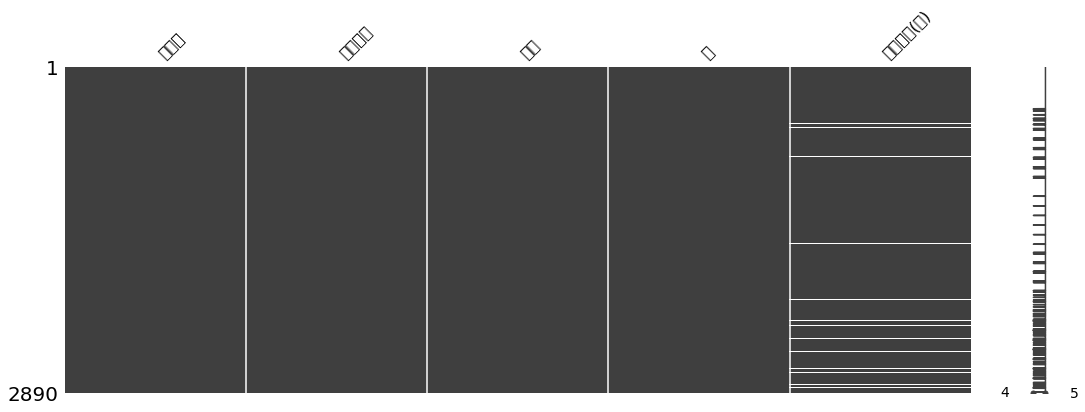

In [ ]:
#결측치 보기
import missingno as msno
msno.matrix(pre_sale, figsize=(18,6))

In [ ]:
# 연도와 월은 카테고리 형태의 데이터이기 때문에 스트링 형태로 변경
pre_sale['연도'] = pre_sale['연도'].astype(str)
pre_sale['월'] = pre_sale['월'].astype(str)

In [ ]:
pre_sale_price = pre_sale['분양가격(㎡)']

In [ ]:
# 분양가격의 타입을 숫자로 변경
# to_numeric : convert argument to a numeric type
# If error is‘coerce, then invalid parsing will be set as NaN.
pre_sale['분양가격'] = pd.to_numeric(pre_sale_price, errors='coerce')
pre_sale['평당분양가격'] = pre_sale['분양가격'] * 3.3

In [ ]:
pre_sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2890 entries, 0 to 2889
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   지역명      2890 non-null   object 
 1   규모구분     2890 non-null   object 
 2   연도       2890 non-null   object 
 3   월        2890 non-null   object 
 4   분양가격(㎡)  2750 non-null   object 
 5   분양가격     2658 non-null   float64
 6   평당분양가격   2658 non-null   float64
dtypes: float64(2), object(5)
memory usage: 158.2+ KB


In [ ]:
pre_sale.dtypes

지역명         object
규모구분        object
연도          object
월           object
분양가격(㎡)     object
분양가격       float64
평당분양가격     float64
dtype: object

In [ ]:
pre_sale.isnull().sum()

지역명          0
규모구분         0
연도           0
월            0
분양가격(㎡)    140
분양가격       232
평당분양가격     232
dtype: int64

In [ ]:
pre_sale.describe()

,분양가격,평당분양가격
count,2658.000000,2658.000000
mean,3063.297216,10108.880813
std,1112.743769,3672.054436
min,1868.000000,6164.400000
25%,2348.000000,7748.400000
50%,2743.000000,9051.900000
75%,3293.750000,10869.375000
max,8098.000000,26723.400000


In [ ]:
pre_sale.describe(include=[np.object])

,지역명,규모구분,연도,월,분양가격(㎡)
count,2890,2890,2890,2890,2750
unique,17,5,4,12,1305
top,전남,전용면적 60㎡초과 85㎡이하,2017,10,2221
freq,170,578,1020,255,17


In [ ]:
# 2017년 데이터만 추출
pre_sale_2017 = pre_sale.loc[pre_sale['연도'] == '2017']
pre_sale_2017.shape

(1020, 7)

In [ ]:
# 같은 값을 갖고 있는 걸로 시도별로 동일하게 데이터가 들어 있는 것을 확인
pre_sale['규모구분'].value_counts()

전용면적 60㎡초과 85㎡이하     578
전용면적 85㎡초과 102㎡이하    578
전용면적 60㎡이하           578
전체                   578
전용면적 102㎡초과          578
Name: 규모구분, dtype: int64

In [ ]:
pre_sale['지역명'].value_counts()

전남    170
경기    170
충남    170
대구    170
충북    170
제주    170
대전    170
강원    170
세종    170
인천    170
경남    170
서울    170
광주    170
전북    170
경북    170
울산    170
부산    170
Name: 지역명, dtype: int64